In [97]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics

from personalization import GraphCustomizer as gc

print(f"TensorFlow Version {tf.__version__}")

TensorFlow Version 2.9.1


In [98]:
df = pd.read_csv("diabetes.csv")

In [99]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [103]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [107]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [108]:
have_diabetes = df[df["Outcome"] == 1]

In [109]:
have_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [110]:
have_diabetes["Age"].mean()

37.06716417910448

In [111]:
dont_have_diabetes = df[df["Outcome"] == 0]

In [112]:
dont_have_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [113]:
dont_have_diabetes["Age"].mean()

31.19

<AxesSubplot:>

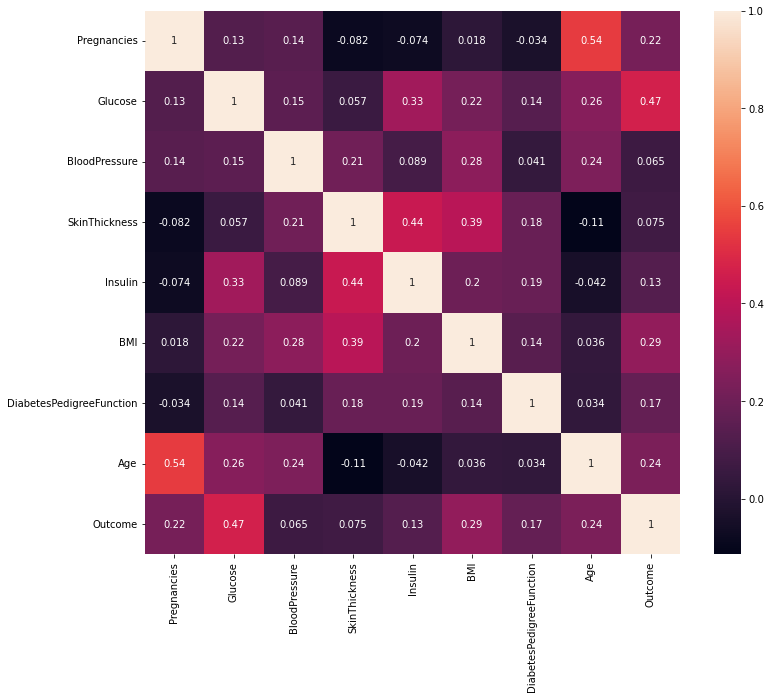

In [114]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

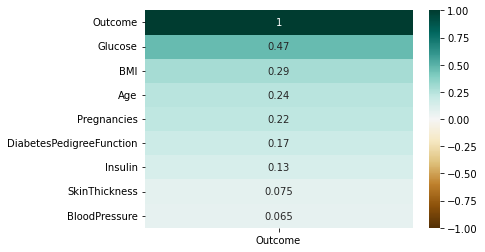

In [115]:
sns.heatmap(
    df.corr()[["Outcome"]].sort_values(by="Outcome", ascending=False),
    vmin=-1,
    vmax=1,
    cmap="BrBG",
    annot=True,
);

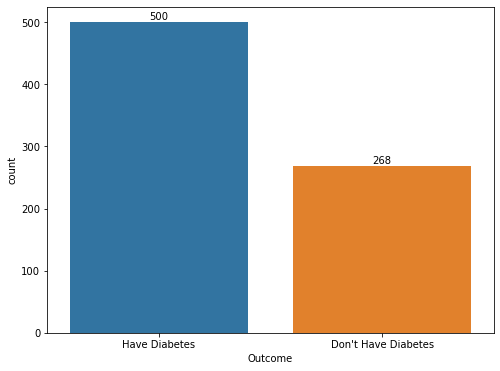

In [116]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Outcome", data=df)
gc.annotate_graph(ax)
plt.xticks([0, 1], labels=["Have Diabetes", "Don't Have Diabetes"])

plt.show()

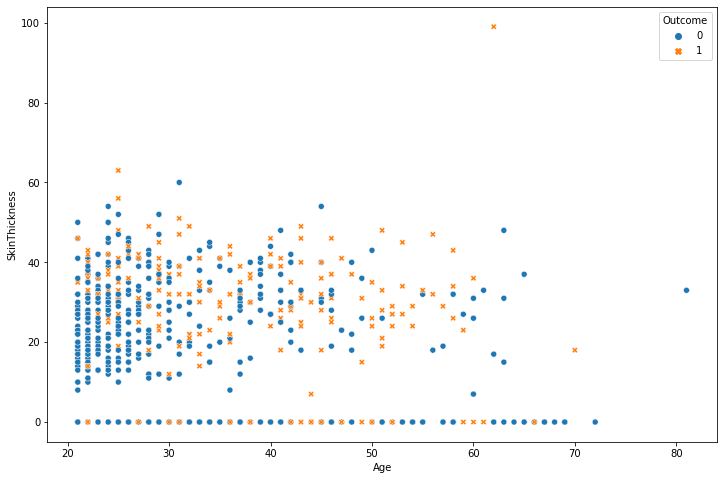

In [117]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df, x="Age", y="SkinThickness", hue="Outcome", style="Outcome"
)

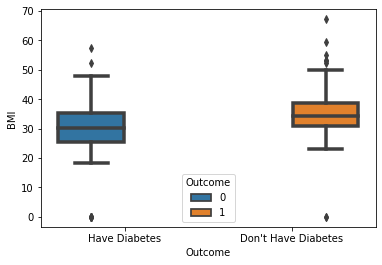

In [118]:
sns.boxplot(x="Outcome", y="BMI", data=df, linewidth=3.5, hue="Outcome")
plt.xticks([0, 1], labels=["Have Diabetes", "Don't Have Diabetes"])

plt.show()

In [119]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [120]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [121]:
X = X.values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [122]:
y = y.values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [123]:
ss = ss()

X = ss.fit_transform(X)

In [124]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [125]:
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)

In [126]:
x_train.shape

(614, 8)

In [127]:
x_test.shape

(154, 8)

In [128]:
y_train.shape

(614,)

In [129]:
y_test.shape

(154,)

In [130]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=400, activation="relu", input_shape=(8,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=400, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=400, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

In [131]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               3600      
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               160400    
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 400)               160400    
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [132]:
classifier.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [133]:
epochs_hist = classifier.fit(x_train, y_train, epochs=250)

Epoch 1/250
20/20 [==============================] - 1s 3ms/step - loss: 0.5561 - accuracy: 0.7003
Epoch 2/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7622
Epoch 3/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.8013
Epoch 4/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7834
Epoch 5/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.7769
Epoch 6/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.7997
Epoch 7/250
20/20 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.7866
Epoch 8/250
20/20 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8013
Epoch 9/250
20/20 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8062
Epoch 10/250
20/20 [==============================] - 0s 5ms/step - loss: 0.3993 - accuracy: 0.8094
Epoch 11/

In [134]:
y_pred = classifier.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [135]:
y_pred

array([[1.22232173e-04],
       [9.77391377e-04],
       [6.45511270e-01],
       [2.19403684e-01],
       [5.71411192e-01],
       [1.45812199e-01],
       [1.11449925e-13],
       [1.45425810e-03],
       [9.99728858e-01],
       [3.15481275e-01],
       [1.54792622e-01],
       [9.99851942e-01],
       [9.73213105e-07],
       [1.76618069e-01],
       [2.51824957e-07],
       [1.03443676e-06],
       [1.10378905e-05],
       [1.70738451e-06],
       [9.99999344e-01],
       [9.99923766e-01],
       [9.99967635e-01],
       [7.96928010e-11],
       [3.79097884e-07],
       [4.64663518e-13],
       [9.99999881e-01],
       [9.99997675e-01],
       [9.71476734e-01],
       [1.01966553e-10],
       [6.04931773e-12],
       [3.02029471e-03],
       [9.99999881e-01],
       [9.79889154e-01],
       [1.00000000e+00],
       [9.99999881e-01],
       [9.71604586e-01],
       [8.99715900e-01],
       [9.67760265e-01],
       [6.33675694e-01],
       [2.98733976e-05],
       [1.00000000e+00],


In [136]:
y_pred = y_pred > 0.5

In [137]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [138]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

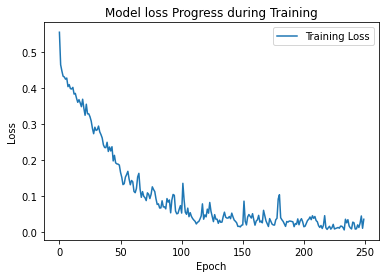

In [139]:
plt.plot(epochs_hist.history["loss"])
plt.title("Model loss Progress during Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss"])

plt.show()

20/20 [==============================] - 0s 2ms/step


<AxesSubplot:>

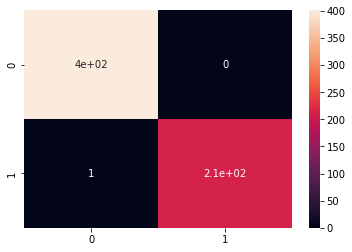

In [140]:
y_train_pred = classifier.predict(x_train)
y_train_pred = y_train_pred > 0.5

matriz = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(matriz, annot=True)

In [141]:
cr = metrics.classification_report(y_train_pred, y_train)
print(f"{cr}")

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       402
        True       1.00      1.00      1.00       212

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



<AxesSubplot:>

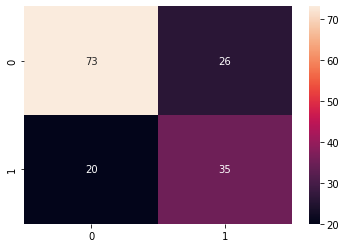

In [142]:
matriz_y_pred = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_y_pred, annot=True)

In [143]:
cr_pred = metrics.classification_report(y_test, y_pred)
print(f"{cr_pred}")

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154

